In [1]:
# pip install matplotlib

In [2]:
# pip install seaborn

In [3]:
# pip install scipy

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
import scipy
import math

fname = r'C:\Users\user\Documents\Oren\Data Science_NAYA_02-2023\My_2nd_DS_Project_EDA\DATASET_ExerciseInPsychiatry.csv'

data = pd.read_csv(fname, sep =';')

In [5]:
data.columns = data.iloc[0]
data = data[1:40+1]

In [6]:
# replaceing ',' into '.' in the SDS, BMI, VO2MAX columns, as well as the '2' matching columns (including SDS2)
data.SDS.replace(to_replace = ',',value = '.',inplace = True, regex =True)
data.SDS2.replace(to_replace = ',',value = '.',inplace = True, regex =True)
data.BMI.replace(to_replace = ',',value = '.',inplace = True, regex =True)
data.BMI2.replace(to_replace = ',',value = '.',inplace = True, regex =True)
data.VO2MAX.replace(to_replace = ',',value = '.',inplace = True, regex =True)
data.VO2MAX2.replace(to_replace = ',',value = '.',inplace = True, regex =True)

In [7]:
data.Group = data.Group.replace('1','cont').replace('2','exer')

In [8]:
# Creating list of headers to be converted to numeric values
numeric_headers = data.columns.values[3:-1]

In [9]:
# for loop iterating through headers to apply pd.to_numeric method to all relevant data columns
data.info()
for header in numeric_headers:
  data[header] = pd.to_numeric(data[header],errors = 'coerce')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 1 to 40
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   nan                 4 non-null      object 
 1   Group               40 non-null     object 
 2   Participant number  40 non-null     object 
 3   AGE                 40 non-null     object 
 4   HADSA               40 non-null     object 
 5   HADSD               40 non-null     object 
 6   CDI                 40 non-null     object 
 7   HAM-D               40 non-null     object 
 8   STAIA               40 non-null     object 
 9   STAIB               40 non-null     object 
 10  BDI                 40 non-null     object 
 11  SDS                 40 non-null     object 
 12  Weight              40 non-null     object 
 13  BMI                 40 non-null     object 
 14  VO2MAX              40 non-null     object 
 15  HADSA2              40 non-null     object 
 16  HADSD2    

In [10]:
num_headers_pre = numeric_headers[1:11+1]
num_headers_post = numeric_headers[12:]
pre_post_pairs = list(zip(num_headers_pre,num_headers_post))

for i in range(len(pre_post_pairs)):
  data['r: ' + str(pre_post_pairs[i][1])+'/'+str(pre_post_pairs[i][0])] = data[pre_post_pairs[i][1]]/data[pre_post_pairs[i][0]]

In [11]:
data.columns

Index([                 nan,              'Group', 'Participant number',
                      'AGE',              'HADSA',              'HADSD',
                      'CDI',              'HAM-D',              'STAIA',
                    'STAIB',                'BDI',                'SDS',
                   'Weight',                'BMI',             'VO2MAX',
                   'HADSA2',             'HADSD2',               'CDI2',
                   'HAM-D2',             'STAIA2',             'STAIB2',
                     'BDI2',               'SDS2',            'Weight2',
                     'BMI2',            'VO2MAX2',                  nan,
          'r: HADSA2/HADSA',    'r: HADSD2/HADSD',        'r: CDI2/CDI',
          'r: HAM-D2/HAM-D',    'r: STAIA2/STAIA',    'r: STAIB2/STAIB',
              'r: BDI2/BDI',        'r: SDS2/SDS',  'r: Weight2/Weight',
              'r: BMI2/BMI',  'r: VO2MAX2/VO2MAX'],
      dtype='object', name=0)

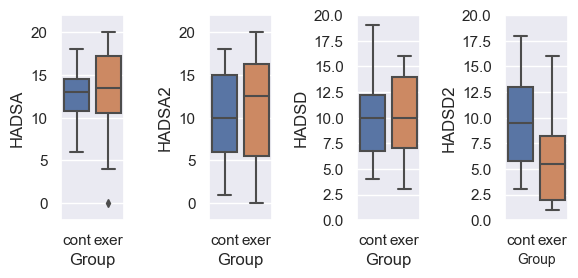

In [12]:
sns.set_style('whitegrid')
sns.set_theme(rc={'figure.figsize':(6,3)})
f0, axes_sns = plt.subplots(1,4)

# sns.boxplot(  y="b", x= "a", data=data,  orient='v' , ax=axes_sns[0])

sns.boxplot(x='Group', y='HADSA', data = data, orient = 'v', ax = axes_sns[0], fliersize=4).set(ylim=(-2,22))
sns.boxplot(x='Group', y='HADSA2', data = data, orient = 'v', ax = axes_sns[1], fliersize=4).set(ylim=(-2,22))
sns.boxplot(x='Group', y='HADSD', data = data, orient = 'v', ax = axes_sns[2], fliersize=4).set(ylim=(0,20))
sns.boxplot(x='Group', y='HADSD2', data = data, orient = 'v', ax = axes_sns[3], fliersize=4).set(ylim=(0,20))

sns.set_context("paper", rc={"font.size":6,"axes.titlesize":6,"axes.labelsize":3})   
plt.xlabel('Group', fontsize=10)
# plt.xlabel('Cont', fontsize=8)
plt.tight_layout(pad=2.5)

# plt.legend(title='Company', fontsize=20)

# plt.ylabel('Sales', fontsize=16);
# plt.title('Sales Data', fontsize=20)
# plt.tick_params(axis='both', which='major', labelsize=14)
# ax0 = sns.stripplot(x='Group', y='HADSD2', data = data, color = 'k', alpha = 0.2)

# def set_pubfig:
    # sns.set_context("paper", rc={"font.size":8,"axes.titlesize":8,"axes.labelsize":5})

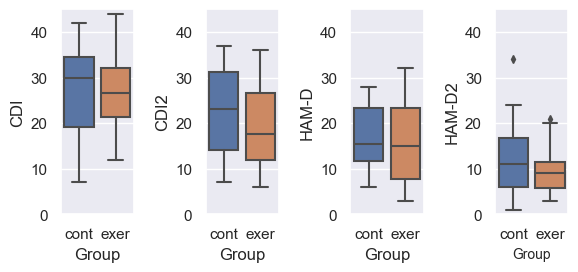

In [13]:
# Plotting CDI/2, HAM-D/2 with sns
# sns.set_style('whitegrid')
sns.set_theme(rc={'figure.figsize':(6,3)})
f1, axes_sns1 = plt.subplots(1,4)

# sns.boxplot(  y="b", x= "a", data=data,  orient='v' , ax=axes_sns[0])

sns.boxplot(x='Group', y='CDI', data = data, orient = 'v', ax = axes_sns1[0], fliersize=4).set(ylim=(0,45))
sns.boxplot(x='Group', y='CDI2', data = data, orient = 'v', ax = axes_sns1[1], fliersize=4).set(ylim=(0,45))
sns.boxplot(x='Group', y='HAM-D', data = data, orient = 'v', ax = axes_sns1[2], fliersize=4).set(ylim=(0,45))
sns.boxplot(x='Group', y='HAM-D2', data = data, orient = 'v', ax = axes_sns1[3], fliersize=4).set(ylim=(0,45))

sns.set_context("paper", rc={"font.size":6,"axes.titlesize":6,"axes.labelsize":3})   
plt.xlabel('Group', fontsize=10)
# plt.xlabel('Cont', fontsize=8)
plt.tight_layout(pad=2.5)

# plt.legend(title='Company', fontsize=20)

# plt.ylabel('Sales', fontsize=16);
# plt.title('Sales Data', fontsize=20)
# plt.tick_params(axis='both', which='major', labelsize=14)
# ax0 = sns.stripplot(x='Group', y='HADSD2', data = data, color = 'k', alpha = 0.2)

# def set_pubfig:
    # sns.set_context("paper", rc={"font.size":8,"axes.titlesize":8,"axes.labelsize":5})

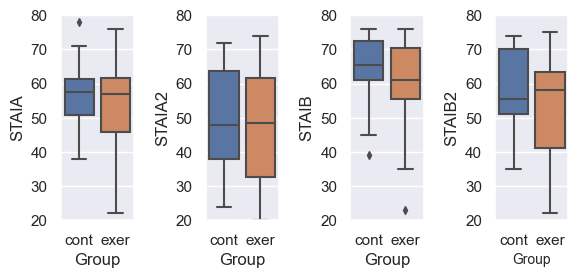

In [14]:
# Plotting STAIA/2, STAIB/2 with sns
# sns.set_style('whitegrid')
sns.set_theme(rc={'figure.figsize':(6,3)})
f1, axes_sns2 = plt.subplots(1,4)

# sns.boxplot(  y="b", x= "a", data=data,  orient='v' , ax=axes_sns[0])

sns.boxplot(x='Group', y='STAIA', data = data, orient = 'v', ax = axes_sns2[0], fliersize=4).set(ylim=(20,80))
sns.boxplot(x='Group', y='STAIA2', data = data, orient = 'v', ax = axes_sns2[1], fliersize=4).set(ylim=(20,80))
sns.boxplot(x='Group', y='STAIB', data = data, orient = 'v', ax = axes_sns2[2], fliersize=4).set(ylim=(20,80))
sns.boxplot(x='Group', y='STAIB2', data = data, orient = 'v', ax = axes_sns2[3], fliersize=4).set(ylim=(20,80))

sns.set_context("paper", rc={"font.size":6,"axes.titlesize":6,"axes.labelsize":3})   
plt.xlabel('Group', fontsize=10)
# plt.xlabel('Cont', fontsize=8)
plt.tight_layout(pad=2.5)

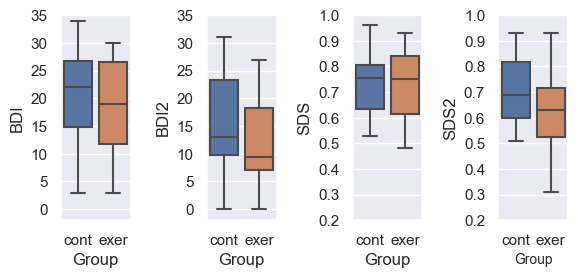

In [15]:
# Plotting BDI/2, SDS/2 with sns
# sns.set_style('whitegrid')
sns.set_theme(rc={'figure.figsize':(6,3)})
f1, axes_sns3 = plt.subplots(1,4)

# sns.boxplot(  y="b", x= "a", data=data,  orient='v' , ax=axes_sns[0])

sns.boxplot(x='Group', y='BDI', data = data, orient = 'v', ax = axes_sns3[0], fliersize=4).set(ylim=(-2,35))
sns.boxplot(x='Group', y='BDI2', data = data, orient = 'v', ax = axes_sns3[1], fliersize=4).set(ylim=(-2,35))
sns.boxplot(x='Group', y='SDS', data = data, orient = 'v', ax = axes_sns3[2], fliersize=4).set(ylim=(0.2,1))
sns.boxplot(x='Group', y='SDS2', data = data, orient = 'v', ax = axes_sns3[3], fliersize=4).set(ylim=(0.2,1))

sns.set_context("paper", rc={"font.size":6,"axes.titlesize":6,"axes.labelsize":3})   
plt.xlabel('Group', fontsize=10)
# plt.xlabel('Cont', fontsize=8)
plt.tight_layout(pad=2.5)

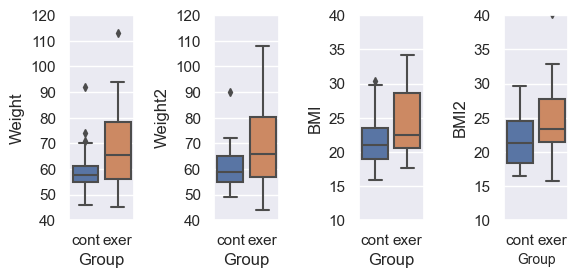

In [16]:
# Plotting Weight/2, BMI/2 with sns
# sns.set_style('whitegrid')
sns.set_theme(rc={'figure.figsize':(6,3)})
f1, axes_sns4 = plt.subplots(1,4)

# sns.boxplot(  y="b", x= "a", data=data,  orient='v' , ax=axes_sns[0])

sns.boxplot(x='Group', y='Weight', data = data, orient = 'v', ax = axes_sns4[0], fliersize=4).set(ylim=(40,120))
sns.boxplot(x='Group', y='Weight2', data = data, orient = 'v', ax = axes_sns4[1], fliersize=4).set(ylim=(40,120))
sns.boxplot(x='Group', y='BMI', data = data, orient = 'v', ax = axes_sns4[2],fliersize=4).set(ylim=(10,40))
sns.boxplot(x='Group', y='BMI2', data = data, orient = 'v', ax = axes_sns4[3], fliersize=4).set(ylim=(10,40))

sns.set_context("paper", rc={"font.size":6,"axes.titlesize":6,"axes.labelsize":3})   
plt.xlabel('Group', fontsize=10)

# plt.xlabel('Cont', fontsize=8)
plt.tight_layout(pad=2.5)

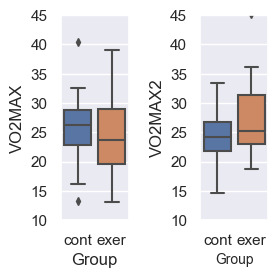

In [40]:
# Plotting VO2MAX/2 with sns 
# sns.set_style('whitegrid')
sns.set_theme(rc={'figure.figsize':(3,3)})
f1, axes_sns4 = plt.subplots(1,2)

# sns.boxplot(  y="b", x= "a", data=data,  orient='v' , ax=axes_sns[0])

sns.boxplot(x='Group', y='VO2MAX', data = data, orient = 'v', ax = axes_sns4[0], fliersize=4).set(ylim=(10,45))
sns.boxplot(x='Group', y='VO2MAX2', data = data, orient = 'v', ax = axes_sns4[1], fliersize=4).set(ylim=(10,45))

sns.set_context("paper", rc={"font.size":6,"axes.titlesize":6,"axes.labelsize":3})   
plt.xlabel('Group', fontsize=10)

# plt.xlabel('Cont', fontsize=8)
plt.tight_layout(pad=2.5)

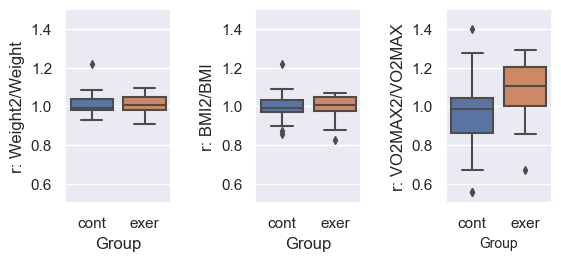

In [42]:
# Plotting ratios of physical scores: Post/Pre-activity
# sns.set_style('whitegrid')
sns.set_theme(rc={'figure.figsize':(6,3)})
f1, axes_sns6 = plt.subplots(1,3)

# sns.boxplot(  y="b", x= "a", data=data,  orient='v' , ax=axes_sns[0])

sns.boxplot(x='Group', y='r: Weight2/Weight', data = data, orient = 'v', ax = axes_sns6[0], fliersize=4).set(ylim=(0.5,1.5))
sns.boxplot(x='Group', y='r: BMI2/BMI', data = data, orient = 'v', ax = axes_sns6[1], fliersize=4).set(ylim=(0.5,1.5))
sns.boxplot(x='Group', y='r: VO2MAX2/VO2MAX', data = data, orient = 'v', ax = axes_sns6[2],fliersize=4).set(ylim=(0.5,1.5))
# sns.boxplot(x='Group', y='BMI2', data = data, orient = 'v', ax = axes_sns4[3], fliersize=4)

sns.set_context("paper", rc={"font.size":6,"axes.titlesize":6,"axes.labelsize":3})   
plt.xlabel('Group', fontsize=10)
plt.tight_layout(pad=3.5)

In [19]:
sns.set_context() 

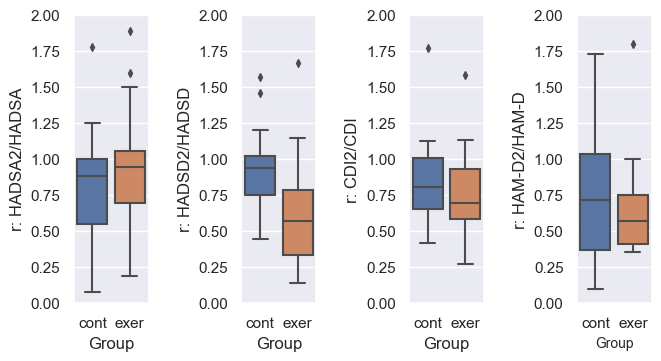

In [20]:
# Plotting ratios of mental health scores: Post/Pre-activity - first 4 features
# sns.set_style('whitegrid')
sns.set_theme(rc={'figure.figsize':(7,4)})
f1, axes_sns7 = plt.subplots(1,4)

# sns.boxplot(  y="b", x= "a", data=data,  orient='v' , ax=axes_sns[0])

sns.boxplot(x='Group', y='r: HADSA2/HADSA', data = data, orient = 'v', ax = axes_sns7[0], fliersize=4).set(ylim=(0,2))
sns.boxplot(x='Group', y='r: HADSD2/HADSD', data = data, orient = 'v', ax = axes_sns7[1], fliersize=4).set(ylim=(0,2))
sns.boxplot(x='Group', y='r: CDI2/CDI', data = data, orient = 'v', ax = axes_sns7[2],fliersize=4).set(ylim=(0,2))
sns.boxplot(x='Group', y='r: HAM-D2/HAM-D', data = data, orient = 'v', ax = axes_sns7[3], fliersize=4).set(ylim=(0,2))

sns.set_context("paper", rc={"font.size":6,"axes.titlesize":6,"axes.labelsize":3})   
plt.xlabel('Group', fontsize=10)
plt.tight_layout(pad=3.5)

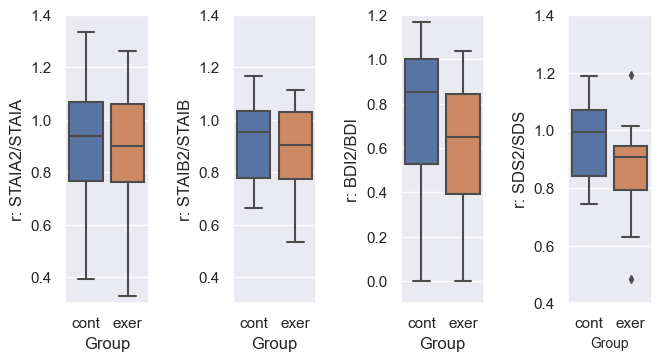

In [21]:
# Plotting ratios of mental health scores: Post/Pre-activity - Last 4 features
# sns.set_style('whitegrid')
sns.set_theme(rc={'figure.figsize':(7,4)})
f1, axes_sns8 = plt.subplots(1,4)

# sns.boxplot(  y="b", x= "a", data=data,  orient='v' , ax=axes_sns[0])

sns.boxplot(x='Group', y='r: STAIA2/STAIA', data = data, orient = 'v', ax = axes_sns8[0], fliersize=4).set(ylim=(0.3,1.4))
sns.boxplot(x='Group', y='r: STAIB2/STAIB', data = data, orient = 'v', ax = axes_sns8[1], fliersize=4).set(ylim=(0.3,1.4))
sns.boxplot(x='Group', y='r: BDI2/BDI', data = data, orient = 'v', ax = axes_sns8[2],fliersize=4).set(ylim=(-0.1,1.2))
sns.boxplot(x='Group', y='r: SDS2/SDS', data = data, orient = 'v', ax = axes_sns8[3], fliersize=4).set(ylim=(0.4,1.4))

sns.set_context("paper", rc={"font.size":6,"axes.titlesize":6,"axes.labelsize":3})   
plt.xlabel('Group', fontsize=10)
plt.tight_layout(pad=3.5)

In [22]:
# when using ax1.boxplot (see upper example), Series containing 'NaN' values interfere with BoxPlotting;
# To avoid that, here I replaced the NaN with the median, since we calc a ratio here;
data['VO2MAX2'].fillna(data['VO2MAX2'].median()+0.001, inplace = True)
data['r: HADSA2/HADSA'].fillna(data['r: HADSA2/HADSA'].median(), inplace = True)
data['r: VO2MAX2/VO2MAX'].fillna(data['r: VO2MAX2/VO2MAX'].median(), inplace = True)

In [23]:
# Testing significance between datasets using wilcoxon Test:
#################################################################
# The Wilcoxon signed-rank test tests the null hypothesis that two related paired samples come from the same distribution. 
# In particular, it tests whether the distribution of the differences x - y is symmetric about zero. 
# It is a non-parametric version of the paired T-test

HADSD_paired_post_pre_r_wilco = scipy.stats.wilcoxon(data[data['Group']=='cont']['r: HADSD2/HADSD'], data[data['Group']=='exer']['r: HADSD2/HADSD'], nan_policy = 'omit')

HADSA_paired_post_pre_r_wilco = scipy.stats.wilcoxon(data[data['Group']=='cont']['r: HADSA2/HADSA'], data[data['Group']=='exer']['r: HADSA2/HADSA'], nan_policy = 'omit')

VO2MAX_paired_post_pre_r_wilco = scipy.stats.wilcoxon(data[data['Group']=='cont']['r: VO2MAX2/VO2MAX'], data[data['Group']=='exer']['r: VO2MAX2/VO2MAX'], nan_policy = 'omit')

BDI_paired_post_pre_r_wilco = scipy.stats.wilcoxon(data[data['Group']=='cont']['r: BDI2/BDI'], data[data['Group']=='exer']['r: BDI2/BDI'], nan_policy = 'omit')

BMI_paired_post_pre_r_wilco = scipy.stats.wilcoxon(data[data['Group']=='cont']['r: BMI2/BMI'], data[data['Group']=='exer']['r: BMI2/BMI'], nan_policy = 'omit')

Weight_paired_post_pre_r_wilco = scipy.stats.wilcoxon(data[data['Group']=='cont']['r: Weight2/Weight'], data[data['Group']=='exer']['r: Weight2/Weight'], nan_policy = 'omit')

HADSD2_post_cont_exer_wilco = scipy.stats.wilcoxon(data[data['Group']=='cont']['HADSD2'], data[data['Group']=='exer']['HADSD2'], nan_policy = 'omit')

HADSA2_post_cont_exer_wilco = scipy.stats.wilcoxon(data[data['Group']=='cont']['HADSA2'], data[data['Group']=='exer']['HADSA2'], nan_policy = 'omit')

VO2MAX_post_cont_exer_wilco = scipy.stats.wilcoxon(data[data['Group']=='cont']['VO2MAX2'], data[data['Group']=='exer']['VO2MAX2'], nan_policy = 'omit')

BDI_post_cont_exer_wilco = scipy.stats.wilcoxon(data[data['Group']=='cont']['BDI2'], data[data['Group']=='exer']['BDI2'], nan_policy = 'omit')



C:\Users\user\anaconda3\envs\eda\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


In [24]:
# Per Patient, Relative score ratio wilcoxon test results:
HADSD_paired_post_pre_r_wilco
HADSA_paired_post_pre_r_wilco
VO2MAX_paired_post_pre_r_wilco
BDI_paired_post_pre_r_wilco

Weight_paired_post_pre_r_wilco
BMI_paired_post_pre_r_wilco

# Post-Intervention control vs. exercise comparison - wilcoxon test results:
HADSD2_post_cont_exer_wilco
HADSA2_post_cont_exer_wilco
VO2MAX_post_cont_exer_wilco
BDI_post_cont_exer_wilco

WilcoxonResult(statistic=65.5, pvalue=0.15364646911621094)

In [25]:
print(list(VO2MAX_paired_post_pre_r_wilco)[1].round(4), list(VO2MAX_post_cont_exer_wilco)[1].round(4))
print(list(Weight_paired_post_pre_r_wilco)[1].round(4))
print(list(BMI_paired_post_pre_r_wilco)[1].round(4))
print(list(BDI_paired_post_pre_r_wilco)[1].round(4), list(BDI_post_cont_exer_wilco)[1].round(4),'\n')

print(list(HADSD_paired_post_pre_r_wilco)[1].round(4), list(HADSD2_post_cont_exer_wilco)[1].round(4))
print(list(HADSA_paired_post_pre_r_wilco)[1].round(4), list(HADSA2_post_cont_exer_wilco)[1].round(4))

0.0073 0.0696
0.9563
0.9273
0.165 0.1536 

0.0153 0.0362
0.2598 0.4749


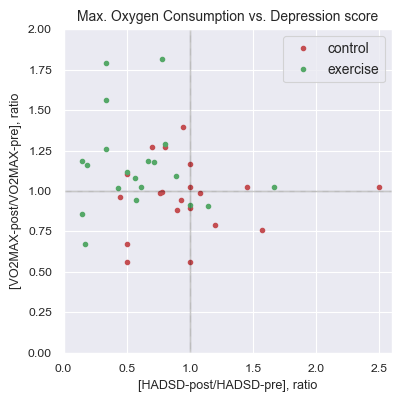

In [26]:
# Scatter plotting individuals signifcant mental ('r: HADSD2/HADSD') and physiological features ('r: VO2MAX2/VO2MAX')
# Testing for possible interaction

x1 = data[data['Group']=='cont']['r: HADSD2/HADSD']
y1 = data[data['Group']=='cont']['r: VO2MAX2/VO2MAX']

x2 = data[data['Group']=='exer']['r: HADSD2/HADSD']
y2 = data[data['Group']=='exer']['r: VO2MAX2/VO2MAX']

fig = plt.figure(figsize=(4,4))
ax = fig.gca()
ax.plot(x1, y1, '.r', x2, y2, '.g',markersize = 6)
# adding the faint-gray-cross for quartiles orientation

x3 = np.linspace(1,1,300)
y3 = np.linspace(0,2,300)

x4 = np.linspace(0,2.6,300)
y4 = np.linspace(1,1,300)
ax.plot(x3, y3, '|k',x4, y4, '_k', alpha = 0.05)

# ax.plot(x3, y3, '_b')
# ax.plot(x2, y2, '.b', lw=5)
# ax.plot(x3, y3, '.g', lw=5)

ax.set_xlim(0,2.6)
ax.set_ylim(0,2)

ax.set_title(label = 'Max. Oxygen Consumption vs. Depression score', fontsize = 10)
ax.set_xlabel(xlabel = '[HADSD-post/HADSD-pre], ratio', fontsize = 9)
ax.set_ylabel(ylabel = '[VO2MAX-post/VO2MAX-pre], ratio', fontsize = 9)
# ax.set_facecolor('white')

plt.tight_layout()

plt.legend(['control','exercise'], fontsize = 10)

In [27]:
# Quantifying 'control' vs. 'exercise' data points per quartile
control_HADSD_VO2MAX_r = list(zip(x1.round(2),y1.round(2)))
exercise_HADSD_VO2MAX_r = list(zip(x2.round(2),y2.round(2)))

def determine_quartile(lst_of_two_tuple, xassay_cutoff, yassay_cutoff):
  xlow_ylow,xlow_yhigh,xhigh_yhigh,xhigh_ylow = 0,0,0,0
  for i in range(len(lst_of_two_tuple)):
    if lst_of_two_tuple[i][0]<xassay_cutoff and lst_of_two_tuple[i][1]<=yassay_cutoff:
      xlow_ylow+=1
    if lst_of_two_tuple[i][0]<xassay_cutoff and lst_of_two_tuple[i][1]>yassay_cutoff:
      xlow_yhigh+=1
    if lst_of_two_tuple[i][0]>=xassay_cutoff and lst_of_two_tuple[i][1]>yassay_cutoff:
      xhigh_yhigh+=1
    if lst_of_two_tuple[i][0]>=xassay_cutoff and lst_of_two_tuple[i][1]<=yassay_cutoff:
      xhigh_ylow+=1

  return xlow_ylow,xlow_yhigh,xhigh_yhigh,xhigh_ylow

In [28]:
ratio_x_cutoff = 1
ratio_y_cutoff = 1

cont_q_distrib = determine_quartile(control_HADSD_VO2MAX_r,ratio_x_cutoff,ratio_y_cutoff)
exer_q_distrib = determine_quartile(exercise_HADSD_VO2MAX_r,ratio_x_cutoff,ratio_y_cutoff)
print(f'The number of dots per xlow_ylow, xlow_yhigh, xhigh_yhigh, xhigh_ylow quartiles are:\nFor control HADSD_VO2MAX ratio: \
{cont_q_distrib}\nFor exercise HADSD_VO2MAX ratio: {exer_q_distrib}')

The number of dots per xlow_ylow, xlow_yhigh, xhigh_yhigh, xhigh_ylow quartiles are:
For control HADSD_VO2MAX ratio: (7, 4, 4, 5)
For exercise HADSD_VO2MAX ratio: (3, 14, 1, 2)


In [29]:
sum(cont_q_distrib), sum(exer_q_distrib)

(20, 20)

In [30]:
# based on the post/pre assays-scores RATIOs
# Calculate probability to get improved HADSD score following control exercise:
prob_better_HADSD_r_control = cont_q_distrib[1]/sum(cont_q_distrib)
prob_better_HADSD_r_exercise = exer_q_distrib[1]/sum(exer_q_distrib)
print(prob_better_HADSD_r_control,prob_better_HADSD_r_exercise)
print("There is {:.1f}-fold higher probability for getting improved Depression-score following continuous physical exercise\
 (compared to impact of non-exercise activity).".format(prob_better_HADSD_r_exercise/prob_better_HADSD_r_control))

0.2 0.7
There is 3.5-fold higher probability for getting improved Depression-score following continuous physical exercise (compared to impact of non-exercise activity).


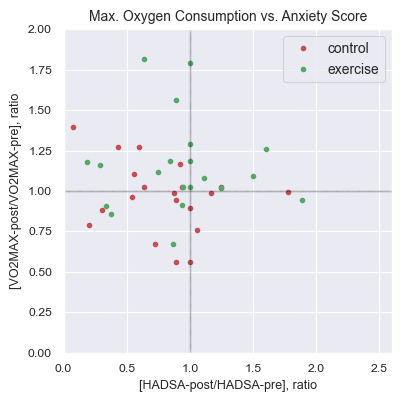

In [31]:
# Scatter plotting individuals signifcant mental ('r: HADSA2/HADSA') and physiological features ('r: VO2MAX2/VO2MAX')
# Testing for possible interaction

x21 = data[data['Group']=='cont']['r: HADSA2/HADSA']
y21 = data[data['Group']=='cont']['r: VO2MAX2/VO2MAX']

x22 = data[data['Group']=='exer']['r: HADSA2/HADSA']
y22 = data[data['Group']=='exer']['r: VO2MAX2/VO2MAX']

fig = plt.figure(figsize=(4,4))
ax1 = fig.gca()
ax1.plot(x21, y21, '.r', x22, y22, '.g',markersize = 6)
# adding the faint-gray-cross for quartiles orientation

x23 = np.linspace(1,1,300)
y23 = np.linspace(0,2,300)

x24 = np.linspace(0,2.6,300)
y24 = np.linspace(1,1,300)
ax1.plot(x23, y23, '|k',x24, y24, '_k', alpha = 0.05,markersize = 6)

# ax.plot(x3, y3, '_b')
# ax.plot(x2, y2, '.b', lw=5)
# ax.plot(x3, y3, '.g', lw=5)

ax1.set_xlim(0,2.6)
ax1.set_ylim(0,2)

ax1.set_title(label = 'Max. Oxygen Consumption vs. Anxiety Score', fontsize = 10)
ax1.set_xlabel(xlabel = '[HADSA-post/HADSA-pre], ratio', fontsize = 9)
ax1.set_ylabel(ylabel = '[VO2MAX-post/VO2MAX-pre], ratio', fontsize = 9)
# ax.set_facecolor('white')

plt.tight_layout()

plt.legend(['control','exercise'], fontsize = 10)

In [32]:
# Quantifying 'control' vs. 'exercise' data points per quartile
control_HADSA_VO2MAX_r = list(zip(x21.round(2),y21.round(2)))
exercise_HADSA_VO2MAX_r = list(zip(x22.round(2),y22.round(2)))

ratio_x_cutoff = 1
ratio_y_cutoff = 1

cont_q_distrib_A = determine_quartile(control_HADSA_VO2MAX_r,ratio_x_cutoff,ratio_y_cutoff)
exer_q_distrib_A = determine_quartile(exercise_HADSA_VO2MAX_r,ratio_x_cutoff,ratio_y_cutoff)
print(f'The number of dots per xlow_ylow, xlow_yhigh, xhigh_yhigh, xhigh_ylow quartiles are:\nFor control HADSA_VO2MAX ratio: \
{cont_q_distrib_A}\nFor exercise HADSA_VO2MAX ratio: {exer_q_distrib_A}')

The number of dots per xlow_ylow, xlow_yhigh, xhigh_yhigh, xhigh_ylow quartiles are:
For control HADSA_VO2MAX ratio: (7, 7, 1, 5)
For exercise HADSA_VO2MAX ratio: (4, 7, 8, 1)


In [33]:
# based on the post/pre assays-scores RATIOs
# Calculate probability to get improved HADSA score following control exercise:
prob_better_HADSA_r_control = cont_q_distrib_A[1]/sum(cont_q_distrib_A)
prob_better_HADSA_r_exercise = exer_q_distrib_A[1]/sum(exer_q_distrib_A)
print(prob_better_HADSA_r_control,prob_better_HADSA_r_exercise)
print("There is {:.1f}-fold higher probability for getting improved Depression-score following continuous physical exercise\
 (compared to impact of non-exercise activity).".format(prob_better_HADSA_r_exercise/prob_better_HADSA_r_control))

0.35 0.35
There is 1.0-fold higher probability for getting improved Depression-score following continuous physical exercise (compared to impact of non-exercise activity).


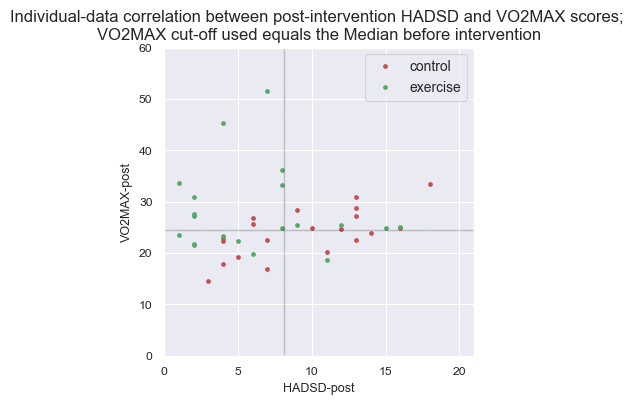

In [34]:
# Scatter plotting Comparing individual's POST Scores: Depression assay 'HADSD2' vs. physiological 'VO2MAX2'
# VO2MAX Cut-off value = Median before intervention per all participants (n=40)
# Testing for possible interaction

x11 = data[data['Group']=='cont']['HADSD2']
y11 = data[data['Group']=='cont']['VO2MAX2']

x12 = data[data['Group']=='exer']['HADSD2']
y12 = data[data['Group']=='exer']['VO2MAX2']

fig2 = plt.figure(figsize=(4,4))
ax2 = fig2.gca()
ax2.plot(x11, y11, '.r', x12, y12, '.g')
# adding the faint-gray-cross for quartiles orientation

x13 = np.linspace(8.1,8.1,300)
y13 = np.linspace(0,60,300)

x14 = np.linspace(0,21,300)
y14 = np.linspace(data['VO2MAX'].median(),data['VO2MAX'].median(),300)
ax2.plot(x13, y13, '|k',x14, y14, '_k', alpha = 0.04)

# ax.plot(x3, y3, '_b')
# ax.plot(x2, y2, '.b', lw=5)
# ax.plot(x3, y3, '.g', lw=5)

ax2.set_xlim(0,21)
ax2.set_ylim(0,60)

ax2.set_title(fontsize = 12, label = 'Individual-data correlation between post-intervention HADSD and VO2MAX scores; \nVO2MAX cut-off used equals the Median before intervention')
ax2.set_xlabel(fontsize = 9, xlabel = 'HADSD-post')
ax2.set_ylabel(fontsize = 9, ylabel = 'VO2MAX-post')

plt.legend(['control','exercise'], fontsize = 10)


In [35]:
# Counting the number of control and exercise dots in the upper scatter plot, this time done only with the post-intervetion HADSD and VO2MAX;
# VO2MAX2_cutoff = median of all participants
# UNLIKE done in the other ratio approach, here I am the one detrmining assays'cut-off values' (more biased...)

control_post_HADSD2_VO2MAX = list(zip(x11.round(2),y11.round(2)))
exercise_post_HADSD_VO2MAX = list(zip(x12.round(2),y12.round(2)))

HADSD2_cutoff = 8.1
VO2MAX2_cutoff = data['VO2MAX'].median()

cont_post_q_distrib = determine_quartile(control_post_HADSD2_VO2MAX,HADSD2_cutoff,VO2MAX2_cutoff)
exer_post_q_distrib = determine_quartile(exercise_post_HADSD_VO2MAX,HADSD2_cutoff,VO2MAX2_cutoff)
print(f'The number of dots per xlow_ylow, xlow_yhigh, xhigh_yhigh, xhigh_ylow quartiles are:\nFor control HADSD-post, VO2MAX-post: \
{cont_post_q_distrib}\nFor exercise HADSD-post, VO2MAX-post: {exer_post_q_distrib}')

The number of dots per xlow_ylow, xlow_yhigh, xhigh_yhigh, xhigh_ylow quartiles are:
For control HADSD-post, VO2MAX-post: (7, 2, 8, 3)
For exercise HADSD-post, VO2MAX-post: (6, 9, 4, 1)


In [36]:
# based on the post-intervention assays:
# Calculate probability to get improved HADSD depression score following control activity:
prob_better_HADSD_control = cont_post_q_distrib[1]/sum(cont_post_q_distrib)

# Calculate probability to get improved HADSD depression score following physical exercise activity:
prob_better_HADSD_exercise = exer_post_q_distrib[1]/sum(exer_post_q_distrib)
print(prob_better_HADSD_control,prob_better_HADSD_exercise)
print(f"There is {prob_better_HADSD_exercise/prob_better_HADSD_control}-fold higher probability for \
getting improved Depression-score following continuous physical exercise \n(compared to impact of non-exercise activity).")

0.1 0.45
There is 4.5-fold higher probability for getting improved Depression-score following continuous physical exercise 
(compared to impact of non-exercise activity).


In [37]:
# Calculating confidence interval of HADSD and VO2MAX post/pre-intervention 
# assay scores of 'control' and 'exercise' groups

HADSD_r_stats = data.groupby('Group')['r: HADSD2/HADSD'].agg(['mean', 'count', 'std']).round(2)
VO2MAX_r_stats = data.groupby('Group')['r: VO2MAX2/VO2MAX'].agg(['mean', 'count', 'std']).round(2)
# print(HADSD_r_stats,'\n'*2, VO2MAX_r_stats)

HADSD_ci95_hi = []
HADSD_ci95_lo = []

VO2MAX_ci95_hi = []
VO2MAX_ci95_lo = []

for group in HADSD_r_stats.index:
    m,c,s = HADSD_r_stats.loc[group]
    HADSD_ci95_lo.append((m - 1.96*s/math.sqrt(c)))
    HADSD_ci95_hi.append((m + 1.96*s/math.sqrt(c)))
    
    
for group in VO2MAX_r_stats.index:
    m,c,s = VO2MAX_r_stats.loc[group]
    VO2MAX_ci95_lo.append((m - 1.96*s/math.sqrt(c)))
    VO2MAX_ci95_hi.append((m + 1.96*s/math.sqrt(c)))

# formatting CI values 
ci_lst = [HADSD_ci95_hi, HADSD_ci95_lo, VO2MAX_ci95_hi, VO2MAX_ci95_lo]
for ci in ci_lst:
    for i in range(len(ci)):
        ci[i] = '{:.3f}'.format(ci[i])

# adding CI values to the dataframe(s)

HADSD_r_stats['HADSD_CI95_low'] = HADSD_ci95_lo
HADSD_r_stats['HADSD_CI95_high'] = HADSD_ci95_hi
VO2MAX_r_stats['VO2MAX_CI95_low'] = VO2MAX_ci95_lo
VO2MAX_r_stats['VO2MAX_CI95_high'] = VO2MAX_ci95_hi


print(HADSD_r_stats, '\n')
print(VO2MAX_r_stats)  

       mean  count   std HADSD_CI95_low HADSD_CI95_high
Group                                                  
cont   0.98     20  0.47          0.774           1.186
exer   0.60     20  0.38          0.433           0.767 

       mean  count   std VO2MAX_CI95_low VO2MAX_CI95_high
Group                                                    
cont   0.96     20  0.22           0.864            1.056
exer   1.15     20  0.29           1.023            1.277
